In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

bank_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_data.shape

(41188, 21)

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

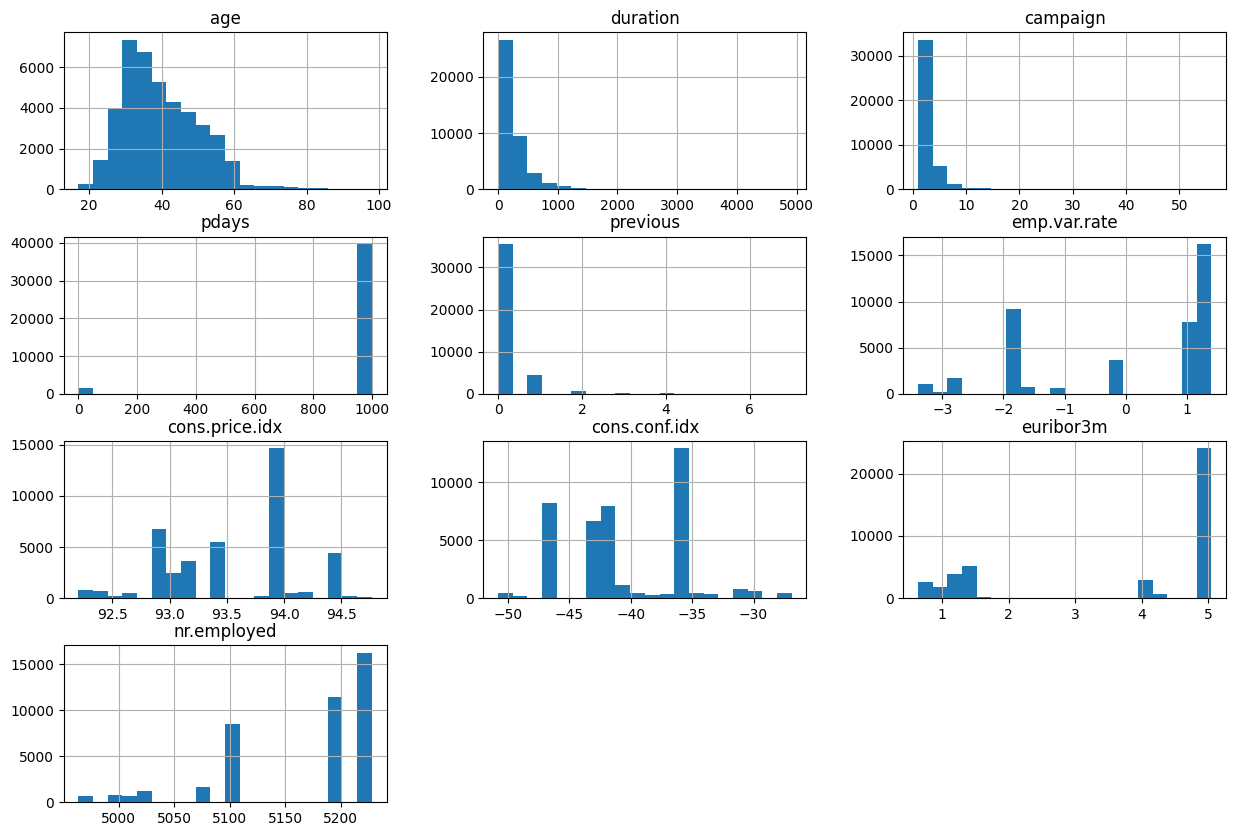

In [7]:
# Plot histograms for numerical features

bank_data.hist(figsize=(15, 10), bins=20)
plt.show()

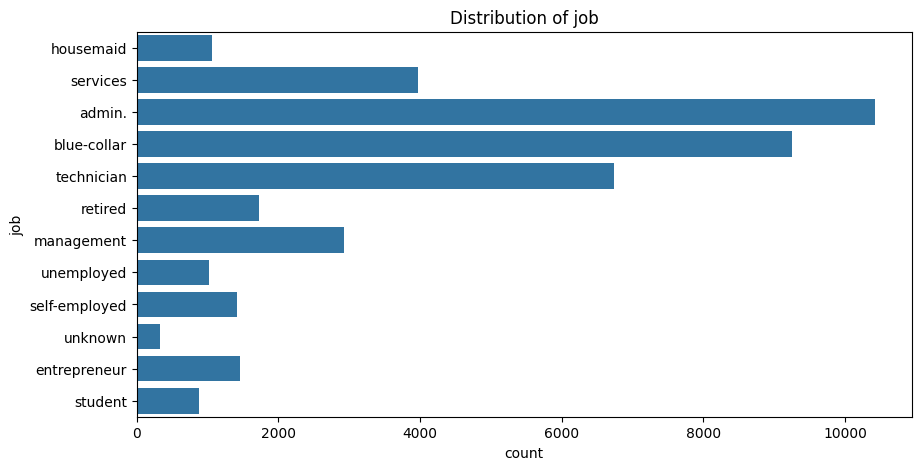

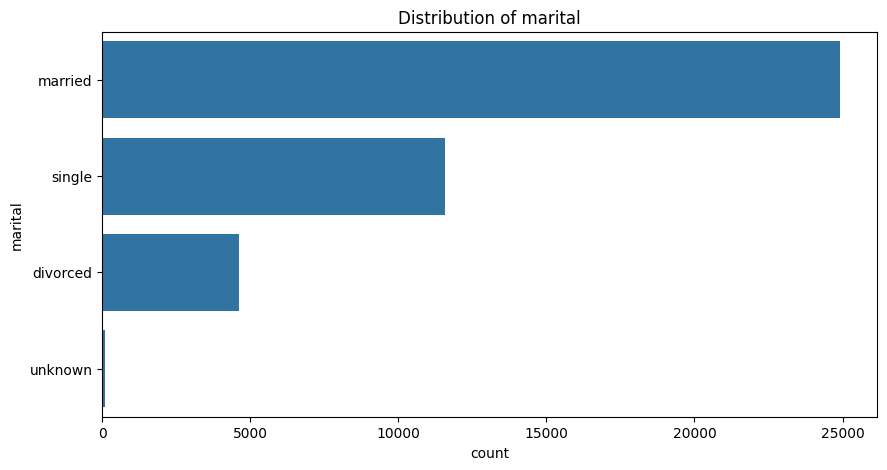

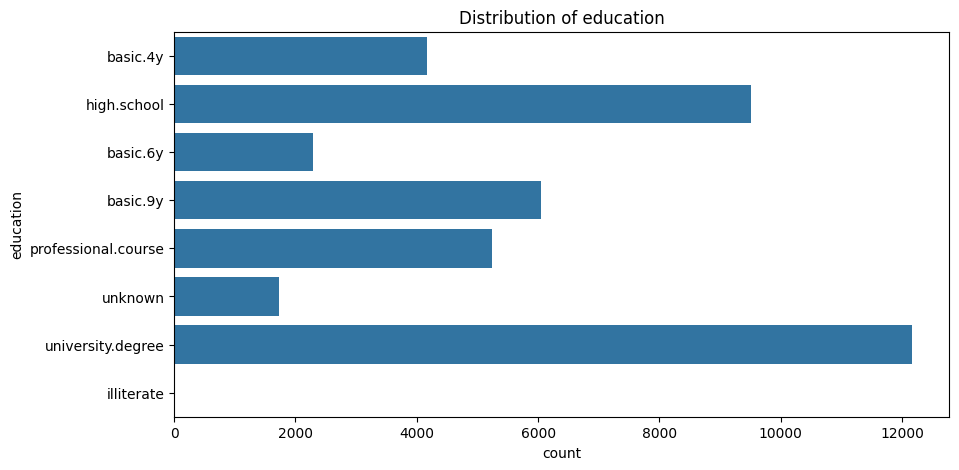

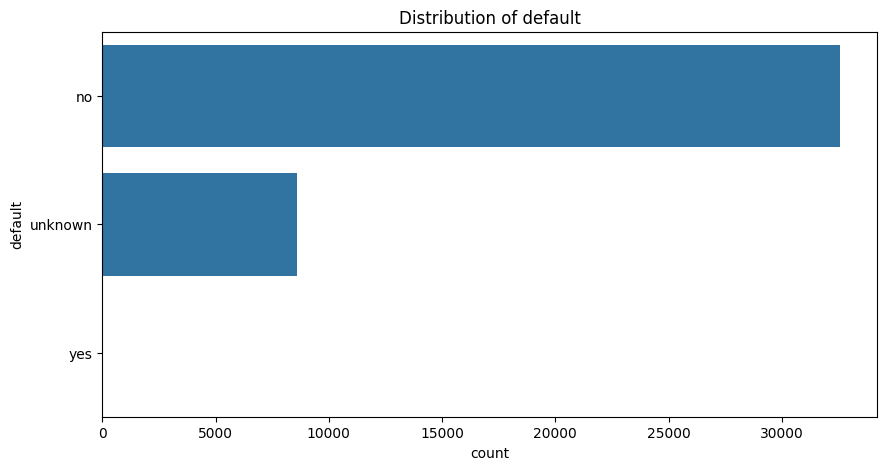

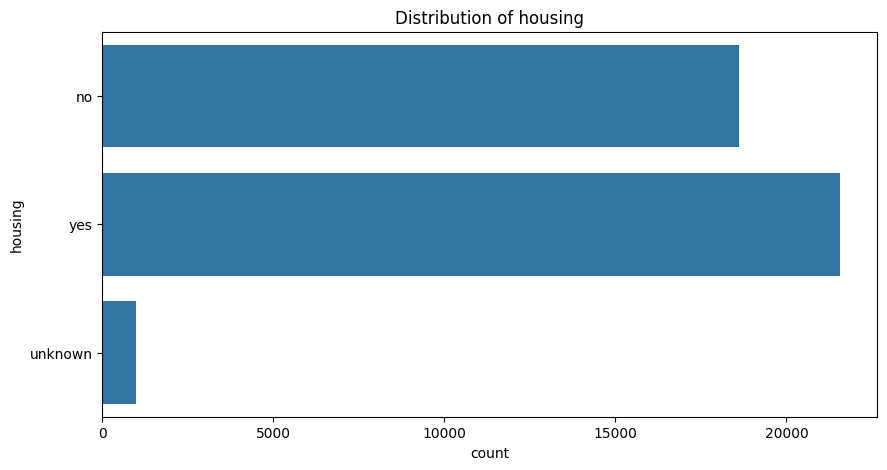

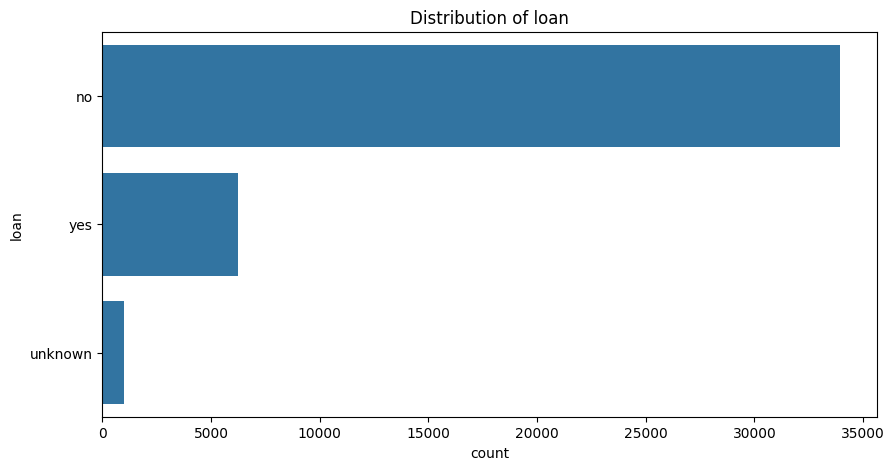

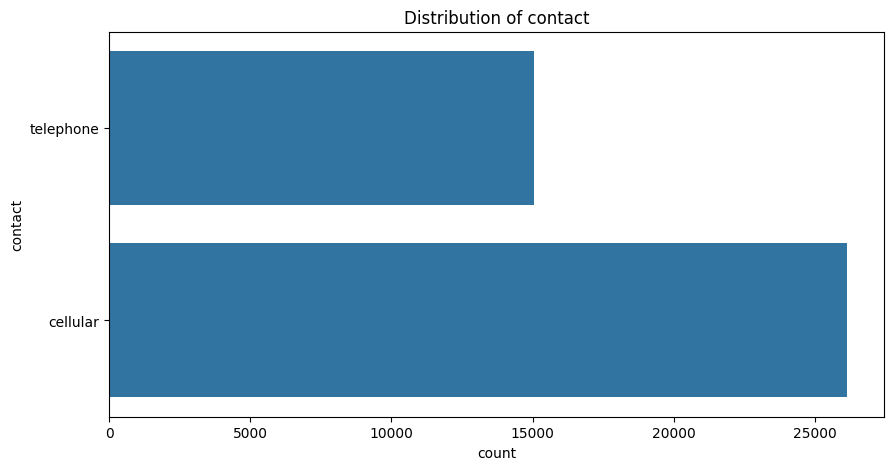

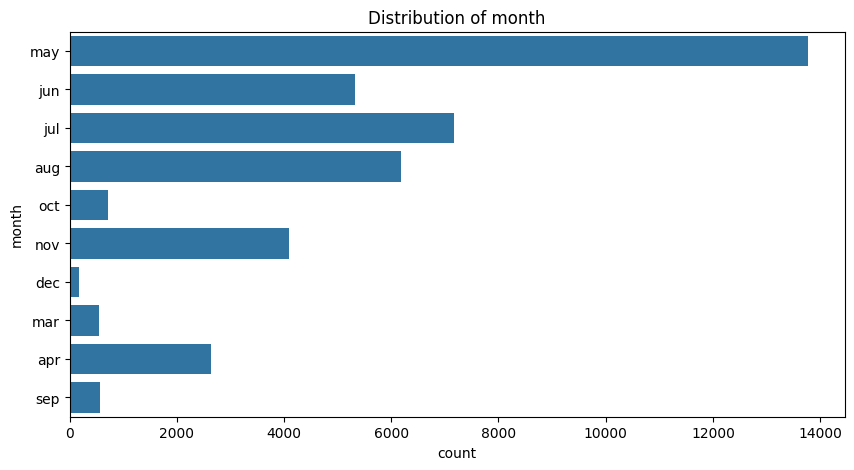

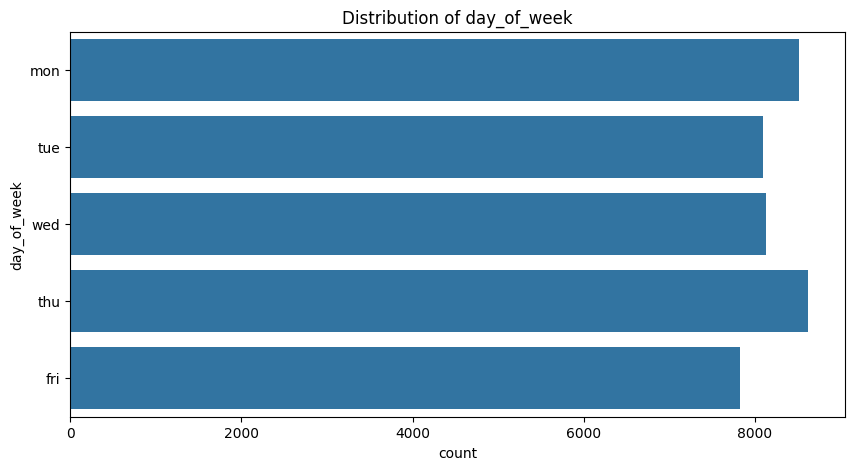

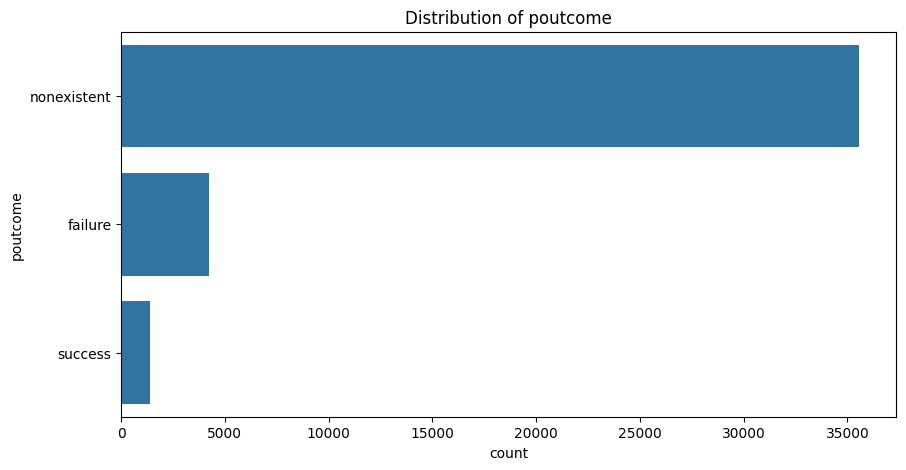

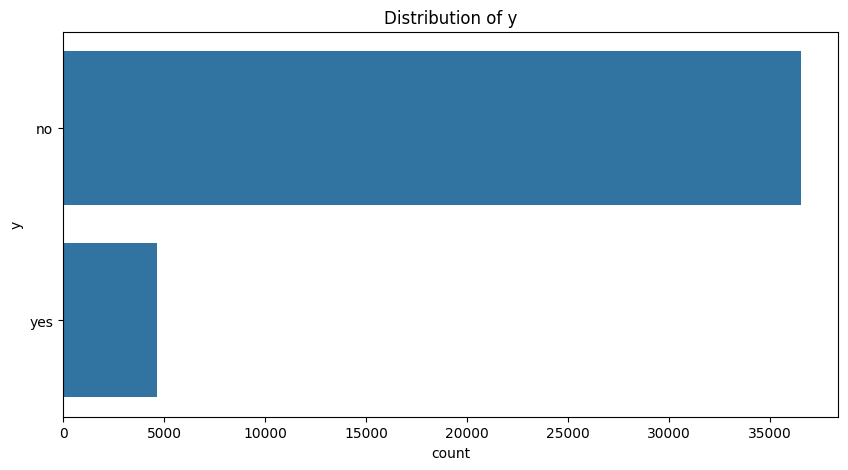

In [8]:
# Plot count plots for categorical features
categorical_features = bank_data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=feature, data=bank_data)
    plt.title(f'Distribution of {feature}')
    plt.show()

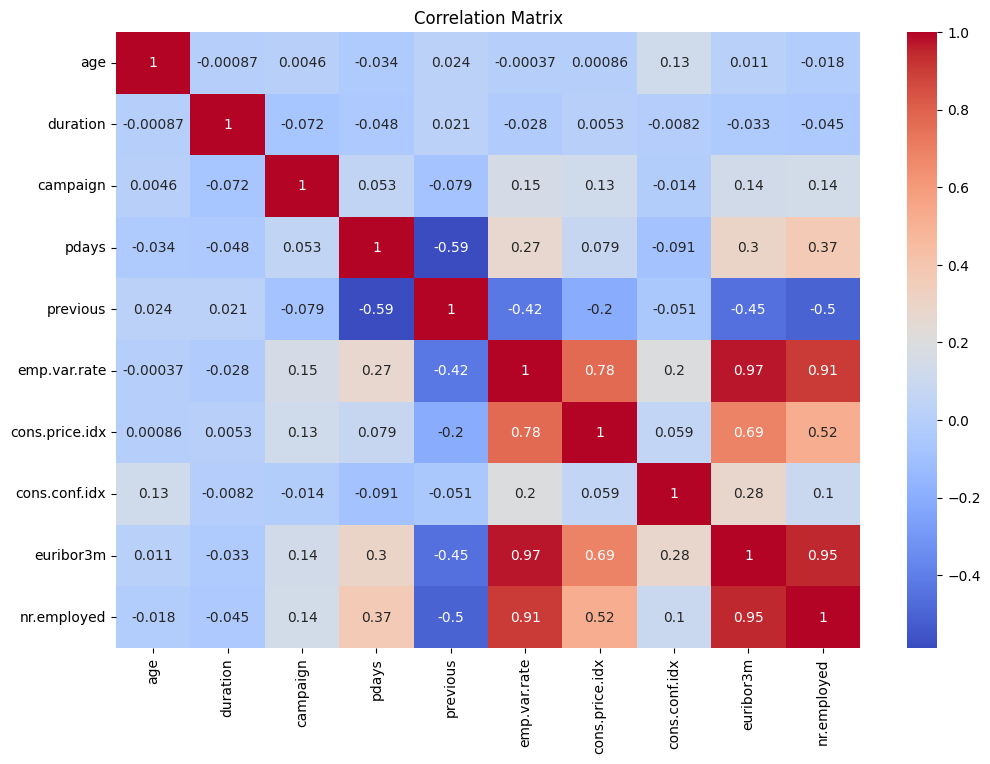

In [9]:
# Select numerical features
num_features = bank_data.drop(columns=categorical_features)

# Compute the correlation matrix
corr_matrix = num_features.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [11]:
# Drop rows with missing values
bank_data.dropna(inplace=True)

# Calculate percentage of missing values
missing_percentage = (bank_data.isnull().sum() / len(bank_data)) * 100

# Display percentage of missing values for each column
print("Percentage of missing values per column:")
print(missing_percentage)


Percentage of missing values per column:
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


In [12]:
# Encode categorical variables using one-hot encoding
bank_data_encoded = pd.get_dummies(bank_data, drop_first=True).astype(int)

# Display the first few rows of the encoded dataset
print("\nEncoded Dataset:")
print(bank_data_encoded.head())


Encoded Dataset:
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0             1              93   
1   57       149         1    999         0             1              93   
2   37       226         1    999         0             1              93   
3   40       151         1    999         0             1              93   
4   56       307         1    999         0             1              93   

   cons.conf.idx  euribor3m  nr.employed  ...  month_nov  month_oct  \
0            -36          4         5191  ...          0          0   
1            -36          4         5191  ...          0          0   
2            -36          4         5191  ...          0          0   
3            -36          4         5191  ...          0          0   
4            -36          4         5191  ...          0          0   

   month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0             

In [ ]:
print(bank_data_encoded.dtypes)

age                              int64
duration                         int64
campaign                         int64
pdays                            int64
previous                         int64
emp.var.rate                     int64
cons.price.idx                   int64
cons.conf.idx                    int64
euribor3m                        int64
nr.employed                      int64
job_blue-collar                  int64
job_entrepreneur                 int64
job_housemaid                    int64
job_management                   int64
job_retired                      int64
job_self-employed                int64
job_services                     int64
job_student                      int64
job_technician                   int64
job_unemployed                   int64
job_unknown                      int64
marital_married                  int64
marital_single                   int64
marital_unknown                  int64
education_basic.6y               int64
education_basic.9y       

In [13]:
from sklearn.model_selection import train_test_split

# Define features and target
X = bank_data_encoded.drop('y_yes', axis=1)
y = bank_data_encoded['y_yes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((32950, 53), (8238, 53), (32950,), (8238,))

In [14]:
#Scale the data 
# Standardize numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[7104  199]
 [ 525  410]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.44      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238



/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


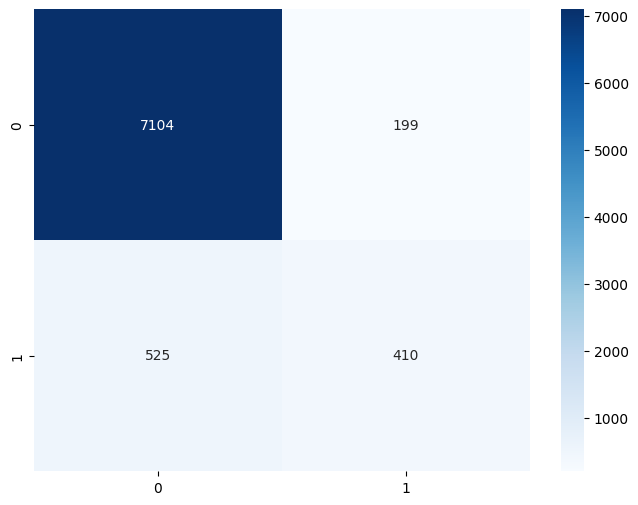

In [20]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [21]:
#Optimize with hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}


In [22]:
# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Best parameters: {'C': 0.1, 'penalty': 'l2'}
Best score: 0.9103793626707132
[[7105  198]
 [ 534  401]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, 

Accuracy stayed the same at 0.91

In [23]:
from pickle import dump

dump(model, open("../models/logistic_regression_C-0.1_penalty-l2_solver-liblinear_42.sav", "wb"))